In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


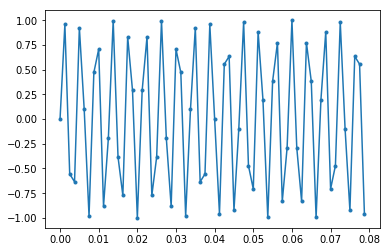

Signal frequency: 237.5


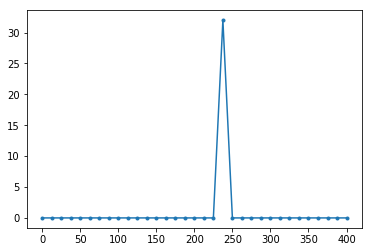

In [3]:
# Part 1
N = 64
Fs = 800
freq = np.fft.rfftfreq(N, d=1/Fs)
f = freq[19]
t = np.arange(N) / Fs
signal = np.sin(2 * np.pi * f * t)
plt.plot(t, signal, ".-")
plt.show()
print(f"Signal frequency: {f}")

sp = np.fft.rfft(signal)
result = np.column_stack((freq, np.abs(sp)))

plt.plot(freq, result[:, 1], ".-")
plt.show()

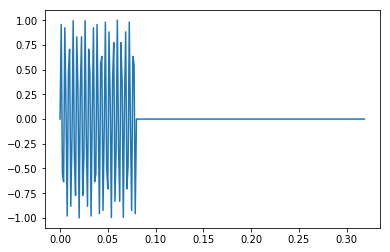

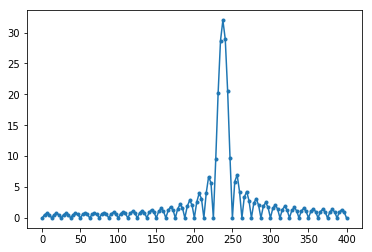

In [4]:
# Part 2
t_extended = np.arange(256) / Fs
signal_extended = np.lib.pad(signal, (0, 256 - N), "constant", constant_values=(0,))

sp_extended = np.fft.rfft(signal_extended)
freq_extended = np.fft.rfftfreq(256, d=1/Fs)
result_extended = np.column_stack((freq_extended, np.abs(sp_extended)))

plt.plot(t_extended, signal_extended)
plt.show()

plt.plot(result_extended[:, 0], result_extended[:, 1], ".-")
plt.show()

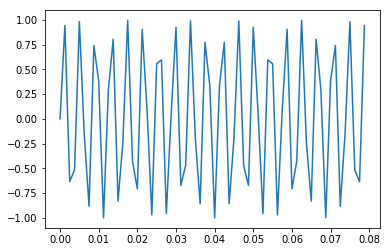

Signal frequency: 243.75


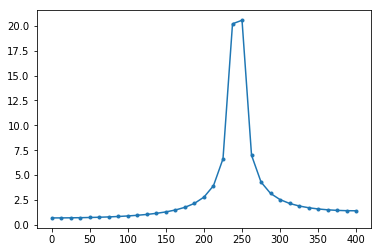

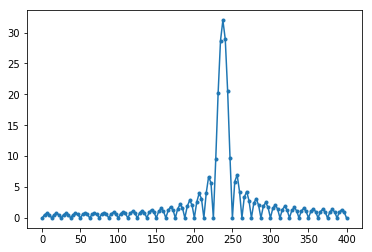

In [6]:
# Part 3
N = 64
freq = np.fft.rfftfreq(N, d=1/Fs)
f = (freq[19] + freq[20]) / 2
t = np.arange(N) / Fs
signal = np.sin(2 * np.pi * f * t)

plt.plot(t, signal)
plt.show()
print(f"Signal frequency: {f}")

sp = np.fft.rfft(signal)
result = np.column_stack((freq, np.abs(sp)))

plt.plot(result[:, 0], result[:, 1], ".-")
plt.show()

sp_extended = np.fft.rfft(signal_extended, n=256)
freq_extended = np.fft.rfftfreq(256, d=1/Fs)
result_extended = np.column_stack((freq_extended, np.abs(sp_extended)))

plt.plot(result_extended[:, 0], result_extended[:, 1], ".-")
plt.show()

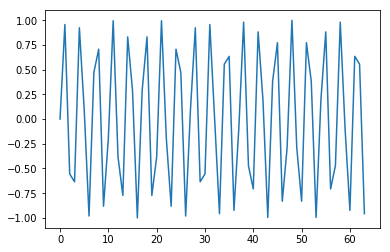

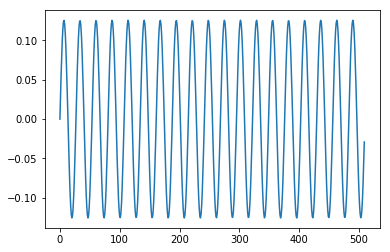

In [8]:
# Part 4, 5
N = 64
freq = np.fft.rfftfreq(N, d=1/Fs)
f = freq[19]
t = np.arange(N) / Fs
signal = np.sin(2 * np.pi * f * t)

plt.plot(np.arange(len(signal)), signal)
plt.show()

sp = np.fft.rfft(signal)
sp_extended = np.lib.pad(sp, (0, 256 - len(sp)), "constant", constant_values=(0,))

recovered_signal = np.fft.irfft(sp_extended)

plt.plot(np.arange(len(recovered_signal)), recovered_signal)
plt.show()

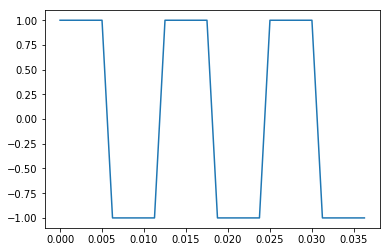

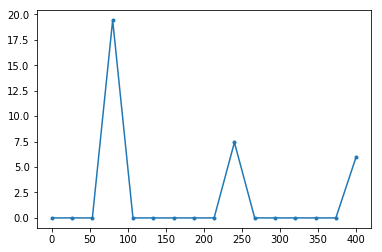

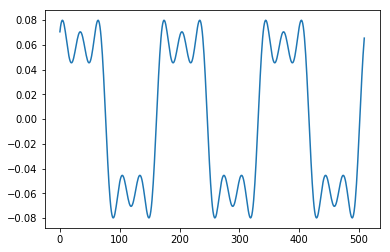

In [5]:
# Part 6.1
from scipy import signal as sign

N = 30
freq = np.fft.rfftfreq(N, d=1/Fs)
t = np.arange(N) / Fs
signal = sign.square(2 * np.pi * Fs/10 * t)

plt.plot(t, signal)
plt.show()

sp = np.fft.rfft(signal)
result = np.column_stack((freq, np.abs(sp)))

plt.plot(result[:, 0], result[:, 1], ".-")
plt.show()

sp_extended = np.lib.pad(sp, (0, 256 - len(sp)), "constant", constant_values=(0,))

recovered_signal = np.fft.irfft(sp_extended)

plt.plot(np.arange(len(recovered_signal)), recovered_signal)
plt.show()

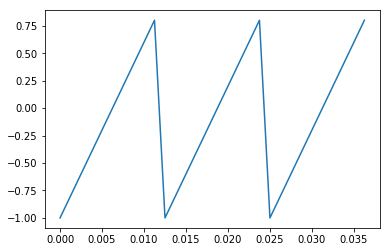

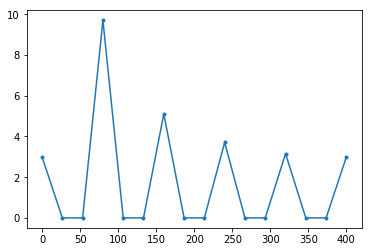

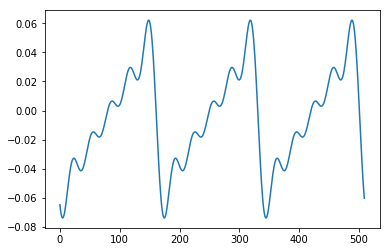

In [6]:
# Part 6.2
from scipy import signal as sign

N = 30
freq = np.fft.rfftfreq(N, d=1/Fs)
t = np.arange(N) / Fs
signal = sign.sawtooth(2 * np.pi * Fs/10 * t)

plt.plot(t, signal)
plt.show()

sp = np.fft.rfft(signal)
result = np.column_stack((freq, np.abs(sp)))

plt.plot(result[:, 0], result[:, 1], ".-")
plt.show()

sp_extended = np.lib.pad(sp, (0, 256 - len(sp)), "constant", constant_values=(0,))

recovered_signal = np.fft.irfft(sp_extended)

plt.plot(np.arange(len(recovered_signal)), recovered_signal)
plt.show()

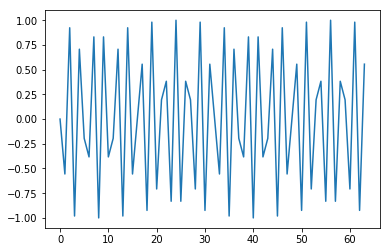

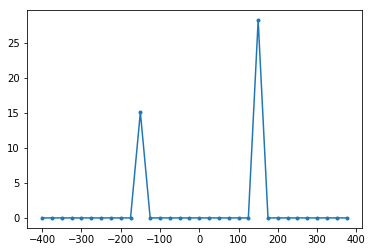

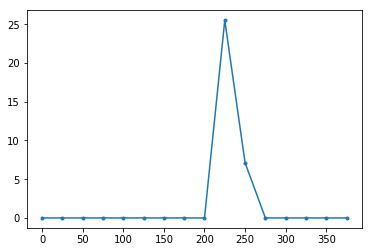

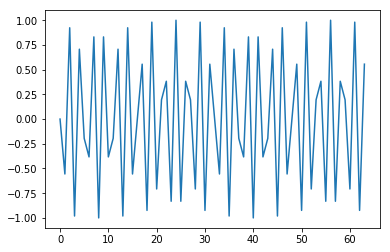

In [26]:
# Part 7
N = 64
freq = np.fft.fftfreq(N // 2, d=1/Fs)
f = freq[19]
t = np.arange(N) / Fs
signal = np.sin(2 * np.pi * f * t)
itr = iter(signal)
complex_signal = [a + b * 1j for a, b in zip(itr, itr)]

plt.plot(np.arange(len(signal)), signal)
plt.show()

sp = np.fft.fft(complex_signal)
result = np.column_stack((freq, np.abs(sp)))
result = result[np.argsort(result[:, 0])]

plt.plot(result[:, 0], result[:, 1], ".-")
plt.show()

real_sp = [(1/2 * (sp[i] + np.conj(sp[N // 2 - i - 1])) + 
            1/2j * (sp[i] - np.conj(sp[N // 2 - i - 1])) * np.exp(-2j * np.pi * i / N)) for i in range(len(sp))]

rfreq = np.fft.rfftfreq(N // 2, d=1/Fs)[:-1]
plt.plot(rfreq, np.split(np.abs(real_sp), 2)[1], ".-")
plt.show()

recovered_signal = []
for x in np.fft.ifft(sp):
    recovered_signal.append(np.real(x))
    recovered_signal.append(np.imag(x))
recovered_signal = np.array(recovered_signal)

plt.plot(np.arange(len(recovered_signal)), recovered_signal)
plt.show()

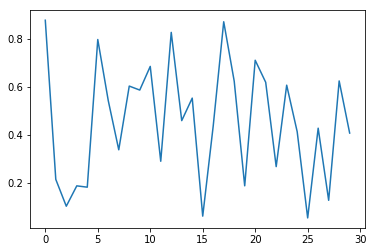

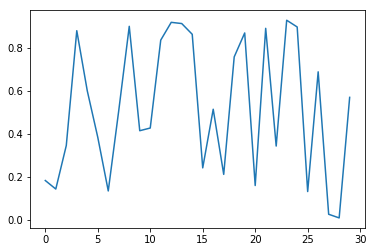

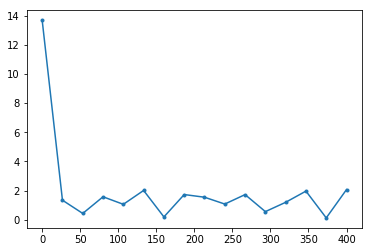

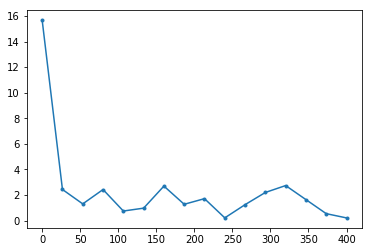

In [9]:
# Part 8
N = 30
freq = np.fft.rfftfreq(N, d=1/Fs)
signal1 = np.random.rand(N)
signal2 = np.random.rand(N)

plt.plot(np.arange(len(signal1)), signal1)
plt.show()

plt.plot(np.arange(len(signal2)), signal2)
plt.show()

sp1 = np.fft.rfft(signal1)
result1 = np.column_stack((freq, np.abs(sp1)))

sp2 = np.fft.rfft(signal2)
result2 = np.column_stack((freq, np.abs(sp2)))

plt.plot(result1[:, 0], result1[:, 1], ".-")
plt.show()

plt.plot(result2[:, 0], result2[:, 1], ".-")
plt.show()

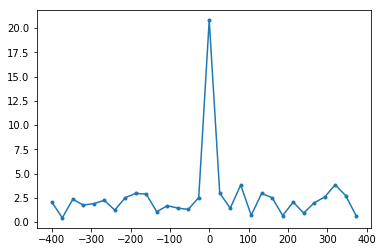

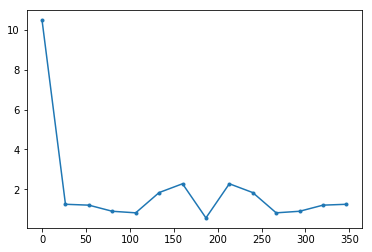

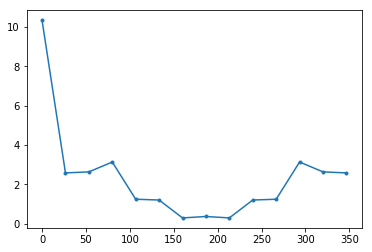

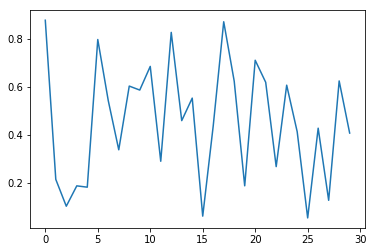

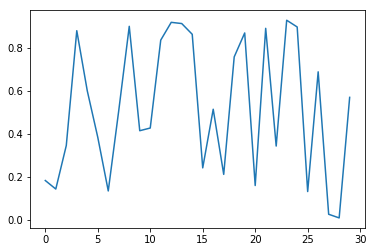

In [22]:
# Part 9
signal = [a + b * 1j for a, b in zip(signal1, signal2)]

N = 30
freq = np.fft.fftfreq(N, d=1/Fs)
sp = np.fft.fft(signal)
result = np.column_stack((freq, np.abs(sp)))
result = result[np.argsort(result[:, 0])]

plt.plot(result[:, 0], result[:, 1], ".-")
plt.show()

real_sp1 = [1/2 * (sp[i] + np.conj(sp[N // 2 - i - 1])) for i in range(len(sp))]
real_sp2 = [-1/2j * (sp[i] - np.conj(sp[N // 2 - i - 1])) for i in range(len(sp))]


rfreq = np.fft.rfftfreq(N, d=1/Fs)[:-2]
plt.plot(rfreq, np.split(np.abs(real_sp1), 2)[0][:-1], ".-")
plt.show()

plt.plot(rfreq,  np.split(np.abs(real_sp2), 2)[0][:-1], ".-")
plt.show()

recovered_signal1 = []
recovered_signal2 = []
for x in np.fft.ifft(sp):
    recovered_signal1.append(np.real(x))
    recovered_signal2.append(np.imag(x))
recovered_signal1 = np.array(recovered_signal1)
recovered_signal2 = np.array(recovered_signal2)
    
plt.plot(np.arange(len(recovered_signal1)), recovered_signal1)
plt.show()

plt.plot(np.arange(len(recovered_signal2)), recovered_signal2)
plt.show()

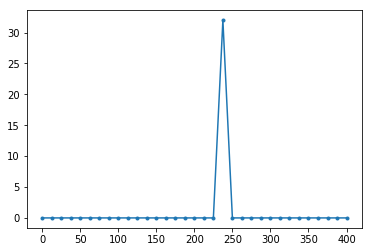

In [163]:
# Part 10
def goertzel(samples, bins, sample_rate=1):
    window_size = len(samples)
    results = []
    for i, f in enumerate(bins):
        w_real = 2.0 * np.cos(2.0 * np.pi * f / sample_rate)

        d1, d2 = 0.0, 0.0
        for n in range(window_size):
            y  = samples[n] + w_real * d1 - d2
            d2, d1 = d1, y
        results.append(np.exp(1j * 2 * np.pi * i / window_size) * d1 - d2)
    return results

N = 64
freq = np.fft.rfftfreq(N, d=1/Fs)
f = freq[19]
t = np.arange(N) / Fs
signal = np.sin(2 * np.pi * f * t)

results = goertzel(signal, freq, Fs)

results = np.column_stack((freq, np.abs(results)))
plt.plot(results[:, 0], results[:, 1], ".-")
plt.show()